<a href="https://colab.research.google.com/github/Krzesimir13/DataQuest/blob/main/traffic_I_94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Finding Heavy Traffic Indicators on I-94

The project makes an analysis of a dataset about the westbound traffic on the I-94 Interstate highway.

The goal of our analysis is to determine a few indicators of heavy traffic on I-94.

## 0. Preparation of the environment
Import of libraries and the dataset from MyDrive.

In [2]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
datasets = Path('/content/drive/MyDrive/Colab Notebooks/Datasets')

Mounted at /content/drive


In [4]:
file_name = 'Metro_Interstate_Traffic_Volume.csv'
metro = pd.read_csv(Path.joinpath(datasets, file_name))

## 1. Preview of the dataset

### 1.1. Basic statistics

In [5]:
metro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [6]:
metro.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [7]:
metro.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,NaN,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,NaN,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,NaN,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,NaN,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,NaN,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [8]:
metro.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000
mean,281.205870,0.334264,0.000222,49.362231,3259.818355
std,13.338232,44.789133,0.008168,39.015750,1986.860670
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1.000000,1193.000000
50%,282.450000,0.000000,0.000000,64.000000,3380.000000
75%,291.806000,0.000000,0.000000,90.000000,4933.000000
max,310.070000,9831.300000,0.510000,100.000000,7280.000000


In [9]:
metro.describe(include=object)

,holiday,weather_main,weather_description,date_time
count,61,48204,48204,48204
unique,11,11,38,40575
top,Labor Day,Clouds,sky is clear,2013-04-18 22:00:00
freq,7,15164,11665,6


### 1.2. Data cleaning

In [10]:
metro['date_time'] = pd.to_datetime(metro['date_time'])
metro['date_time'].head()

,date_time
0,2012-10-02 09:00:00
1,2012-10-02 10:00:00
2,2012-10-02 11:00:00
3,2012-10-02 12:00:00
4,2012-10-02 13:00:00


## 2. Visualisation of data

### 2.1. Histogram of the `traffic_volume` column

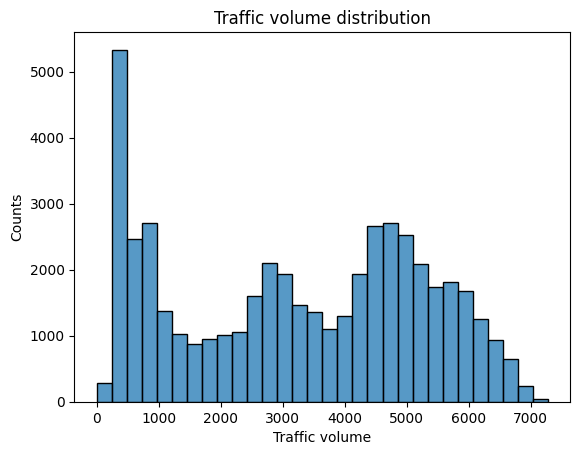

In [11]:
sns.histplot(metro['traffic_volume'], bins=30)
plt.xlabel("Traffic volume")
plt.ylabel("Counts")
plt.title("Traffic volume distribution")
plt.show()

In [12]:
metro['traffic_volume'].describe()

,traffic_volume
count,48204.000000
mean,3259.818355
std,1986.860670
min,0.000000
25%,1193.000000
50%,3380.000000
75%,4933.000000
max,7280.000000


Basing on histogram and quantiles, I can distiguish four sorts of traffic:


*   small (0-1500)
*   medium (1500-3750)
*   high (3750-5250)
*   very high (5250+)

### 2.2. Exploring the dependance of daytime and traffic volume

I divided a day for two parts:


*   Daytime [7 am - 7 pm)
*   Nighttime [7 pm - 7 am)

In [13]:
metro['hour'] = metro['date_time'].dt.hour
metro.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,hour
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,9
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,10
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,11
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,12
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,13


In [14]:
daytraffic = metro[metro['hour'].between(7, 19, inclusive='left')]
nighttraffic = metro[~metro['hour'].between(7, 19, inclusive='left')]

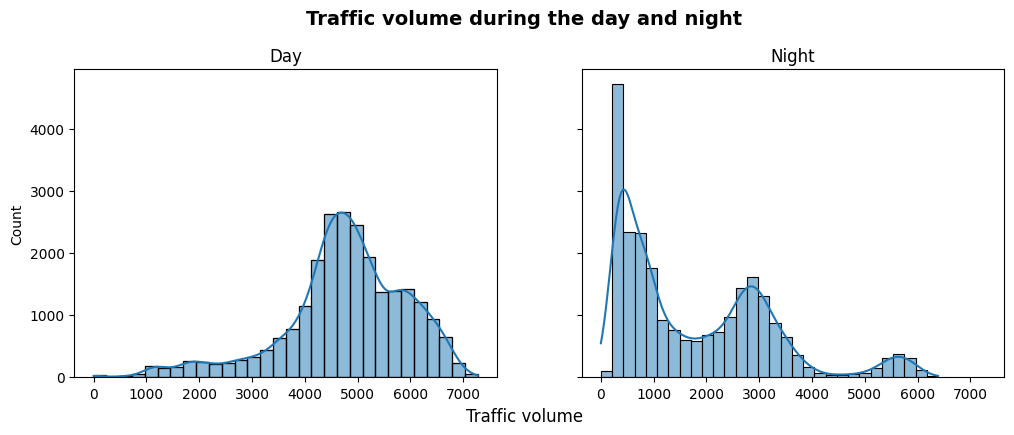

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4),
                       sharex=True, sharey=True)

sns.histplot(data=daytraffic, x='traffic_volume', bins=30, ax=ax[0], kde=True)
sns.histplot(data=nighttraffic, x='traffic_volume', bins=30, ax=ax[1], kde=True)

ax[0].set_title("Day")
ax[1].set_title("Night")
ax[0].set_xlabel("")
ax[1].set_xlabel("")
fig.suptitle("Traffic volume during the day and night",
             fontsize=14, fontweight='bold', y=1.03)
fig.supxlabel('Traffic volume', y=-0.01)

plt.show()

Traffic distribution differs between day and night.
Heavy traffic occurs mainly during the day.
During the night, there is generally low / medium traffic.

Thus, the daytime data show us more about the traffic.

### 2.3. Time **indicators**

I am going to look at a few line plots showing how the traffic volume changed according to the month, weekday, daytime.

/tmp/ipython-input-1815360698.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daytraffic.loc[:, 'month'] = daytraffic['date_time'].dt.month


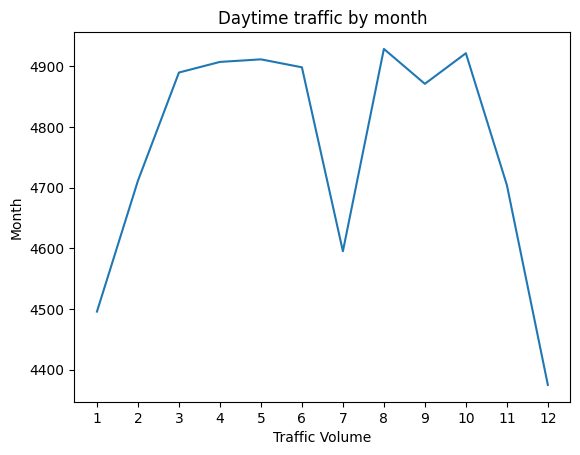

In [16]:
daytraffic.loc[:, 'month'] = daytraffic['date_time'].dt.month
by_month = daytraffic.groupby('month').mean(numeric_only=True)

sns.lineplot(by_month, x='month', y='traffic_volume')
plt.xlabel('Traffic Volume')
plt.title('Daytime traffic by month')
plt.xticks(range(1, 13))
plt.ylabel('Month')
plt.show()

The highest traffic is from March to June and from August to October.
However, there are no big differences.


---



/tmp/ipython-input-2717602551.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daytraffic.loc[:, 'day_of_week'] = daytraffic['date_time'].dt.dayofweek


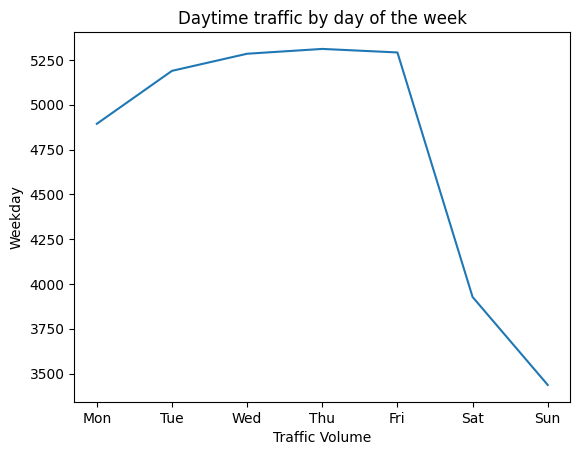

In [17]:
import calendar


daytraffic.loc[:, 'day_of_week'] = daytraffic['date_time'].dt.dayofweek
by_weekday = daytraffic.groupby('day_of_week').mean(numeric_only=True)

sns.lineplot(by_weekday, x='day_of_week', y='traffic_volume')
plt.xlabel('Traffic Volume')
plt.title('Daytime traffic by day of the week')
plt.xticks(ticks=range(7), labels=list(calendar.day_abbr))
plt.ylabel('Weekday')
plt.show()

The traffic is significantly higher during the business days, lower at weekends.

Then, is necessary to separate weekends and business days.

In [18]:
business_day = daytraffic[daytraffic['date_time'].dt.dayofweek <= 4]
weekend_day = daytraffic[daytraffic['date_time'].dt.dayofweek > 4]

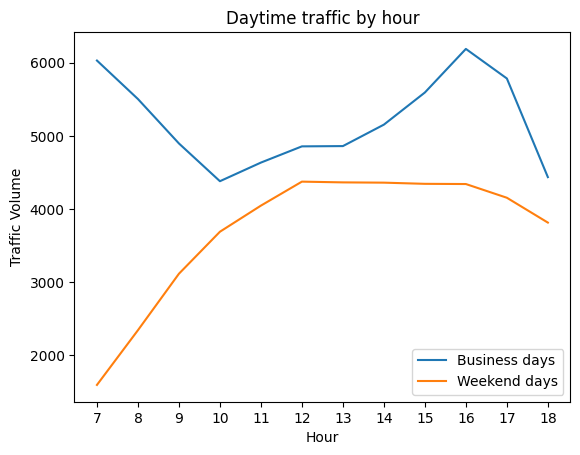

In [19]:
business_by_hour = business_day.groupby('hour')['traffic_volume'].\
                    mean(numeric_only=True)
weekend_by_hour = weekend_day.groupby('hour')['traffic_volume'].\
                    mean(numeric_only=True)

sns.lineplot(business_by_hour, label='Business days')
sns.lineplot(weekend_by_hour, label='Weekend days')

plt.title('Daytime traffic by hour')
plt.xlabel('Hour')
plt.ylabel('Traffic Volume')
plt.legend()
plt.xticks(range(7, 19))
plt.show()

The traffic during the business days is highest when people go to work (7-8h) and come back from work (15-17h).
At weekends, the traffic grows expotentially and reach the pleateau from 12h.



---

In summary, the traffic is the highest during business days, especially when people go to/from work.

---



### 2.4. Weather indicators

Firstly, I will try to find connections between traffic and weather numerical columns: `temp`, `rain_1h`, `snow_1h`, `clouds_all`.

I will use correlation plots and tables.

There are some wrong temperatures, so the column needs to be corrected.

---



In [20]:
metro = metro[metro['temp'] > 200]

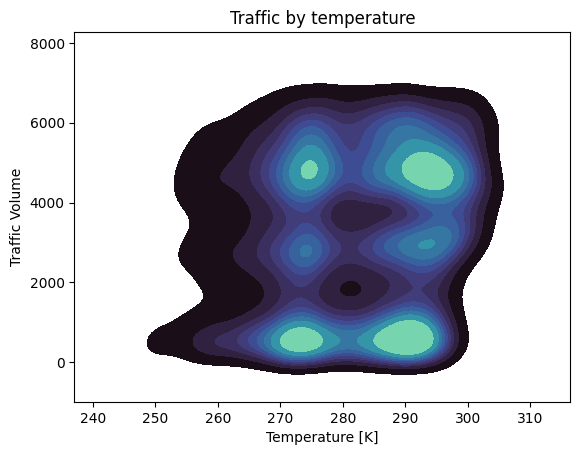

In [21]:
sns.kdeplot(metro, x='temp', y='traffic_volume', fill=True, cmap='mako')
plt.title('Traffic by temperature')
plt.xlabel('Temperature [K]')
plt.ylabel('Traffic Volume')

plt.show()

In [22]:
metro['traffic_volume'].corr(metro['temp'])

np.float64(0.13229131507313124)

Heatmap shows rather two ranges of most common temperatures: near 273 and near 290 K. Correlation coefficient shows a weak positive dependence between traffic and temperature.

---
There are some wrong values in `rain_1h`, so the column needs to be corrected.

In [23]:
metro = metro[metro['rain_1h'] < 1000]

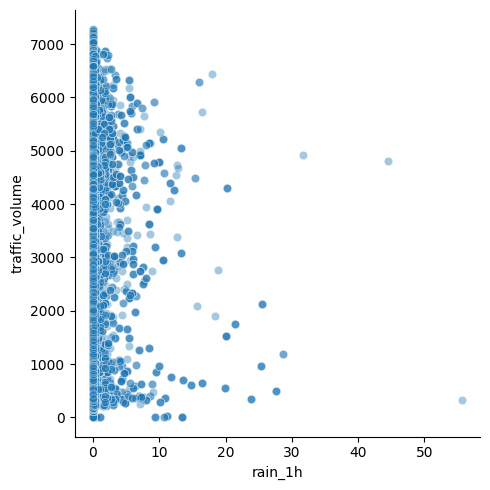

In [34]:
sns.relplot(metro, x='rain_1h', y='traffic_volume', alpha=0.4)
plt.show()

The light rain was filtered and a weak negative corelation between rain and traffic was found.

In [32]:
rain_days = metro[metro['rain_1h'] > 0.2]
rain_days['traffic_volume'].corr(rain_days['rain_1h'])

np.float64(-0.10183224289205094)

Now, let's see the correlation with snow.

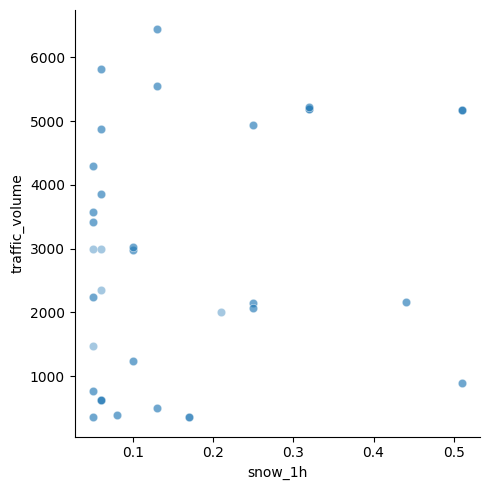

In [36]:
sns.relplot(metro[metro['snow_1h'] > 0.0], x='snow_1h', y='traffic_volume', alpha=0.4)
plt.show()

Not enough data to elucidate the correlation.


---



Now, let's see the correlation with clouds and traffic.

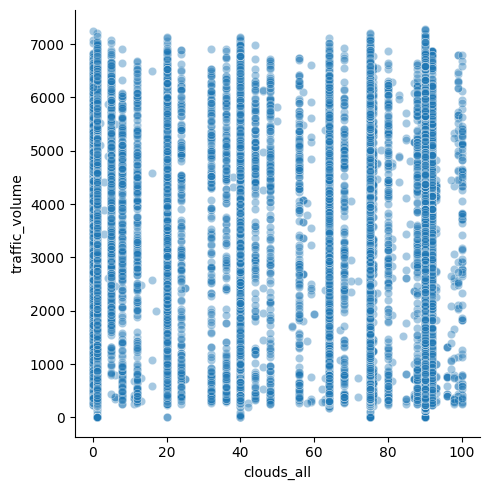

In [37]:
sns.relplot(metro, x='clouds_all', y='traffic_volume', alpha=0.4)
plt.show()

In [38]:
metro['traffic_volume'].corr(metro['clouds_all'])

np.float64(0.06680422908447595)

Weak positive correlation.


---



Now, let's see any corelations between `traffic_volume` and non-numeric weather columns `weather_main` and `weather_description`.